In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA 
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [8]:
wine = pd.read_csv('assets/datasets/wine_v.csv')

In [9]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Varietal
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cabernet
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cabernet
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cabernet
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Cabernet
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cabernet


In [11]:
y = wine.Varietal

In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
Varietal                1599 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [23]:
X = wine[[u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality']]

In [41]:
Xt = StandardScaler().fit_transform(X)

In [45]:
# create covariance matrix
covMat = np.cov(Xt.T)
eigenValues, eigenVectors = np.linalg.eig(covMat)

In [46]:
eigenSum = sum(eigenValues)
ExpVar = [(i / eigenSum)*100 for i in sorted(eigenValues, reverse=True)]
CumulativeExpVar = np.cumsum(ExpVar)

In [58]:
eigenValues

array([ 3.12312087,  2.24328497,  1.68397283,  1.21578121,  0.97387267,
        0.05955516,  0.18033141,  0.3281246 ,  0.41156493,  0.50618912,
        0.61870473,  0.66300688])

In [47]:
CumulativeExpVar

array([ 26.00973081,  44.69208117,  58.71641193,  68.84158587,
        76.95211604,  82.47371808,  87.62636639,  91.84197103,
        95.26953384,  98.00219545,  99.50401736, 100.        ])

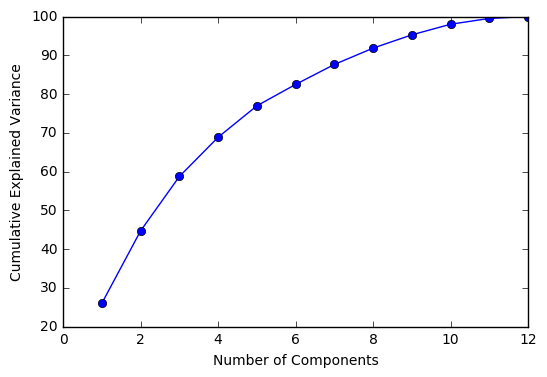

In [53]:
# graph of cum exp var vs # components
plt.plot(range(1,13), CumulativeExpVar, '-o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [64]:
pca = PCA(n_components = 8)
Y = pca.fit_transform(Xt)

In [65]:
pcs = pd.DataFrame(Y, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])

In [68]:
# do train test split on pcs and y
X_train, X_test, y_train, y_test = train_test_split(pcs, y, test_size = 0.3)

In [75]:
#knn time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
y_pred = knn.predict(X_test)

In [92]:
X_test.shape

(480, 8)

In [81]:
knn.classes_

array(['Cabarnet', 'Cabernet', 'Malbec', 'Merlot', 'Pinot Noir'], dtype=object)

In [84]:
# confusion matrix
conmat = confusion_matrix(y_test, y_pred, labels = knn.classes_)
conmat = pd.DataFrame(conmat, columns = knn.classes_, index = knn.classes_)
conmat

,Cabarnet,Cabernet,Malbec,Merlot,Pinot Noir
Cabarnet,29,6,2,20,0
Cabernet,8,17,3,38,0
Malbec,5,5,26,27,2
Merlot,28,28,19,147,10
Pinot Noir,5,6,10,34,5


In [86]:
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

   Cabarnet       0.39      0.51      0.44        57
   Cabernet       0.27      0.26      0.27        66
     Malbec       0.43      0.40      0.42        65
     Merlot       0.55      0.63      0.59       232
 Pinot Noir       0.29      0.08      0.13        60

avg / total       0.45      0.47      0.45       480



In [91]:
print "Accuracy: ", accuracy_score(y_test, y_pred)

 Accuracy:  0.466666666667
